In [4]:
import csv 
import pandas as pd
import numpy as np
import collections
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import shutil
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


dataframe = pd.read_csv('./Churn_Modelling.csv', na_values=['NA','?'])
dataframe

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
def normalizeMinAndMax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [5]:
dataframe = dataframe.reindex(np.random.permutation(dataframe.index))
dataframe.reset_index(inplace=True, drop=True)

In [6]:
#Encode
encodeOne = pd.get_dummies(dataframe['Geography'])
encodeTwo = pd.get_dummies(dataframe['Gender'])
df = dataframe.drop(['Geography', 'Gender'],axis = 1)
df = df.join(encodeOne)
df = df.join(encodeTwo)

In [7]:
#Normalize
normalizeMinAndMax(df,'CreditScore')
normalizeMinAndMax(df,'Age')
normalizeMinAndMax(df,'Balance')
normalizeMinAndMax(df,'EstimatedSalary')
normalizeMinAndMax(df,'Tenure')
normalizeMinAndMax(df,'NumOfProducts')

In [8]:
#Split data
numInstances = 10000
numTrain = 2000
numTest = numInstances - numTrain

trainingData = df[:numTest]
testData = df[numTest:]
testData.reset_index(inplace=True, drop=True)

In [9]:
#Drop columns that are not needed
x_train = trainingData.drop(['RowNumber', 'CustomerId','Surname'] ,axis=1)
x_test = testData.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'] ,axis=1)
y_test = pd.DataFrame(testData, columns=['Exited'])

C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

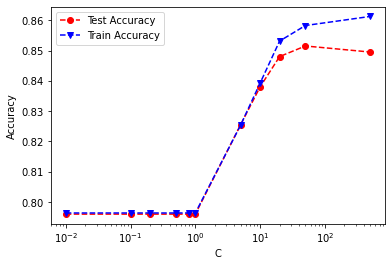

In [10]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50, 500]

SVMLtestAcc = []
SVMLtrainAcc = []
Y = pd.DataFrame(x_train, columns=['Exited'])
X = x_train.drop(['Exited'],axis=1)

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X,Y)
    svml_pred = clf.predict(x_test)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

In [11]:
#apply Naive-Bayes classifier 

from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,Y)
NB_pred = clf_NB.predict(x_test)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))

[0 0 0 ... 0 0 0]
Accuracy on test data is 0.81


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 1 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 0 0]


C:\Users\Vika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

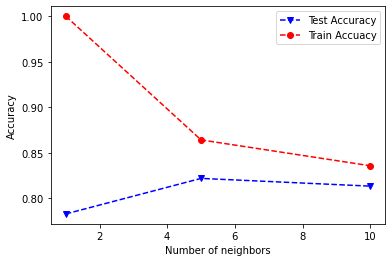

In [12]:
# KNN 

from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X,Y)
    knn_pred = clf.predict(x_test)
    knn_pred_train = clf.predict(X)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(Y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')